In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
import scipy.misc
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from PIL import Image
from io import BytesIO
import base64

Here we can see a sample Y-value
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Which represents the number 5. Indeed, if we look at the image, we see that it looks like this:


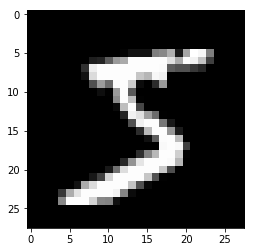

In [172]:
(X_train_orig,Y_train_orig),(X_test_orig,Y_test_orig)= mnist.load_data() #Load data from database. In this, X_train and X_test represent the pictures of images, while Y_Train and Y_Test represent what number each image is in the form of a number from 0 to 9.
X_train=X_train_orig.reshape(X_train.shape[0],28,28,1) #Here we convert our data into a rank 4 tensor
#Here we change Y_train and Y_test from numbers from 0-9 into a 1x10 matrix.
Y_train = np_utils.to_categorical(Y_train_orig) 
Y_test = np_utils.to_categorical(Y_test_orig)
#Here we normalize the data to change the values of the matrix from 0-255 into numbers from 0-1.
X_train=X_train/255
X_test=X_test/255
print("Here we can see a sample Y-value")

print(Y_train[0])
print("Which represents the number 5. Indeed, if we look at the image, we see that it looks like this:")
plt.imshow(X_train_orig[0], cmap=plt.get_cmap('gray'))
plt.show()



In [157]:
#Here we set up the network and create the overall structure to the network. Notice that as we continur, other than max_pooling and flatten, the layers increase in size then decrease at the end. 
print("Here we see the number of parameters. Notice how for every layer (Except for max_pooling2d and flatten, which I will explain shortly),\n the number of parameters increases until it reaches a peak. In our case, that peak is 48128 parameters. We can think of the neural \n network as taking in our value, breaking it up into little pieces and therefore increasing the number of parameters the next layer takes \n in, then finally lowering as it has already preformed most tests.") 
model = Sequential()
model.add(Conv2D(30, (3, 3), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
print("Max pooling and flatten are different, however. The job of max pooling is to find feature that most of them share, and therefore can't be \n used. An example of this is given you're trying to identify the faces of people standing in front of a field. Since we know that all \n pictures will include the field behind them, it makes no sense to use this while trying to distinguish faces. Flatten simply converts it \n to a form that the next layer can take in (we can think of this as an adapter)")

Here we see the number of parameters. Notice how for every layer (Except for max_pooling2d and flatten, which I will explain shortly),
 the number of parameters increases until it reaches a peak. In our case, that peak is 48128 parameters. We can think of the neural 
 network as taking in our value, breaking it up into little pieces and therefore increasing the number of parameters the next layer takes 
 in, then finally lowering as it has already preformed most tests.
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 11, 11, 15)        4065      
_________________________________________

In [173]:
#Here we take the data and train it using our training data.
hist=model.fit(X_train,Y_train,epochs=3,batch_size=300,verbose=2)


Epoch 1/3
 - 34s - loss: 0.0633 - acc: 0.9808
Epoch 2/3
 - 34s - loss: 0.0522 - acc: 0.9842
Epoch 3/3
 - 34s - loss: 0.0458 - acc: 0.9863


In [174]:
#Here, we test the neural network with random data from our database, not necessarily the data we used.
modacc=model.evaluate(X_train,Y_train,verbose=2) 
print("Has accuracy of "+str(100*round(modacc[1],4))+"%.")

Has accuracy of 98.96000000000001%.


In [0]:
#Here, we take the neural network's structure and save them to an external file for later use. Note this is not the trained network, but instead an outline of the network.
#model_trained = model.to_json()
#with open("model_trained.json", "w") as json_file:
#    json_file.write(model_trained)
#We then take the values which we got from training the network and save those as well. This way we will be able to use the network without having to train it every time.
#model.save_weights("model_trained.h5")
model.save("try.h5")

In [0]:
#Here, we take the accuracy and save it into a new file. This allows us to later plot the data so we can see the accuracy of the network over time as we train it.
accuracy=hist.history['acc']
x=range(len(accuracy))
data=np.array([x,accuracy])
np.savetxt("data.csv",data,delimiter=",")

In [0]:
new_model= load_model("try.h5") #Here we load the model, as on our website this is in a new file.


In [0]:
data = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZAAAAGQCAYAAACAvzbMAAAgAElEQVR4Xu3dC5RkdXXv8d8+1TO8hIgZRIPMVPV0VQMCvvABXmViDDJdPXgxYpZMokujJnoTE70x+Iio4CM+k0ii0RsTvZhAHJ/Q1QMmNww+1iiIRhGYru7p6tEBlOkYovIYpuvsu2p6UERgeqrPqf/5V31nrVm+6uy9/5995LdOP6pM/EEAAQQQQKALAeviGi5BAAEEEEBABAg3AQIIIIBAVwIESFdsXIQAAgggQIBwDyCAAAIIdCVAgHTFxkUIIIAAAgQI9wACCCCAQFcCBEhXbFyEAAIIIECAcA8ggAACCHQlQIB0xcZFCCCAAAIECPcAAggggEBXAgRIV2xchAACCCBAgHAPIIAAAgh0JUCAdMXGRQgggAACBAj3AAIIIIBAVwIESFdsXIQAAgggQIBwDyCAAAIIdCVAgHTFxkUIIIAAAgQI9wACCCCAQFcCBEhXbFyEAAIIIECAcA8ggAACCHQlQIB0xcZFCCCAAAIECPcAAggggEBXAgRIV2xchAACCCBAgHAPIIAAAgh0JUCAdMXGRQgggAACBAj3AAIIIIBAVwIESFdsXIQAAgggQIBwDyCAAAIIdCVAgHTFxkUIIIAAAgQI9wACCCCAQFcCBEhXbFyEAAIIIECAcA8ggAACCHQlQIB0xcZFCCCAAAIECPcAAggggEBXAgRIV2xchAACCCBAgHAPIIAAAgh0JUCAdMXGRQgggAACBAj3AAIIIIBAVwIESFdsXIQAAgggQIBwDyCAAAIIdCVAgHTFxkUIIIAAAgQI9wACCCCAQFcCBEhXbFyEAAIIIECAcA8ggAACCHQlQIB0xcZFCCCAAAIECPcAAggggEBXAgRIV2xchAACCCBAgHAPIIAAAgh0JUCAdMXGRQgggAACBAj3AAIIIIBAVwIESFdsXHSgAtvOGj38YNeqtnxVaUGrPNEjXTrJpGNdbpL9OHH9d1v6yWJtf7jJHmXmR7t0s8luS10/3k/fIyQdZ9KQSbcqsRus7deXHnbnlmM37bzrQGfm9Qgg8NACBAh3SNcCM/W1Jw6p9Bw3rZTsTsmPNGmVS6vMF/9VP/97UNeNMrjQpBvk/okFG9o80rjpuxmUpAQCAy9AgAz8LbB0gFvXjxx1V6n0YZM/UakeI9OKpV9dnFe66/tmNinXZq3cfXXl83O3F2c6JkEgHgECJJ5dBZ20NT6yzj3Z1HnCCDpIDs1d+n+JabKd2pfWTk59I4cWlESgLwUIkL5ca7aHmq3XPmjSH2VbtbDV5kya9FRfkg1dXZm88QeFnZTBEAgsQIAEXkDR28/Va+9w6Y1FnzOv+dzti4n51Zba1Ws2T301rz7URSBGAQIkxq31aOZmvXr8CtmNPWpX+DYu7ZT51+XJZnnyb8OTN+0o/NAMiECOAgRIjrixl27Va5+VdHbs58htftdtkl1yUMnf/muXN+dz60NhBAoqQIAUdDGhx5rbMFrx1GdDzxFR/yvMdFF5ojkZ0cyMisCyBAiQZfH178U7xqrjqdnl/XvC3E42l7o+YYk+NzzR/HZuXSiMQAEECJACLKGII8zVq29y2duLOFtEM20z05fldkm5MXVVRHMzKgJLEiBAlsQ0eC+aHateZmYbBu/kuZy4824tE3N3Pvp5v75ly0IuHSiKQAABAiQAegwtW/XqhyR7ZQyzxjOj/ZfM31OZaP5FPDMzKQIPLkCAcHc8oMBcffSlLv8YPDkIuL+kMjn98RwqUxKBngoQID3ljqdZa6z6VJl9LZ6Jo5r0Li/ZE4Yvm5qKamqGReB+AgQIt8QDCvzgjJMPu2vF3Z1/wB0DUfYCnTd0HJ5srs6+MhUR6J0AAdI76+g6tcZqr5fpXdENHsvA7n9XmZzm+0yx7Is5f0mAAOGmeEiBuXrtuy49FqZcBG6tNJq/lktliiLQAwECpAfIMbeYee7aY0sLpe/FfIYiz+7y3x9uTH+0yDMyGwIPJkCAcG/sV2B6/cgRQ0nS+a30Z+73xbzggARc2jHcaJYP6CJejEBBBAiQgiwihjFaY7XXyPSBZc76I0nzkv+nXPfIzFwqmfRDc80t5zPRzfyxcltjps43p49e5pw9vNzfXWlMv76HDWmFQCYCBEgmjINT5Adnr33k3XtKT3fXWYl0Qrr4U1olST820065Wqk0K/m8S/Pmmi+5z+9p+/zaU7fP29uU9kJr9szRk5PEn+HSM8zU+dcif69hR4WnkF7cFvTIWIAAyRiUcsUU6Hwkb5om6xLpGer8LdbnuaeVRrMTwvxBICoBAiSqdTFsFgLbzho9/ODUn52m+g1bDJOTs6i7nBqJ0t9d05j55HJqcC0CvRYgQHotTr/CCWwfH14tX/HsRP5sk04P8eUul1823Jh+buFwGAiBhxAgQLg9ELifwOx47XFydcLkdyQ9TlIP/n/il1UIEO7FyAR68H+MyEQYF4H7CbTGam8x07NdOk1Skg+Qb6o0pl+QT22qIpCPAAGSjytV+1CgdeZxZSu1N7rs+ZIen/ERL6k0mudmXJNyCOQqQIDkykvxfhWYrdcu3vclrkyO6PJ/Gm5Md75kxh8EohEgQKJZFYMWSWBufHSju2f2U1Mm/3S5MX1Okc7ILAjsT4AA2Z8Q/zsCDyCwvV59XiL7TIY4k5VGs55hPUohkLsAAZI7MQ36UaA1NnqmzDdneLarKo3mszKsRykEchcgQHInpkE/CsyOVZ9pZldneLavVxrNp2VYj1II5C5AgOROTIN+FNh+Zu3JSUnXZHU2l64fbjSD/0Z8VuehzmAIECCDsWdOmbHAjg0jj03T5LtZlTVpptxoVrOqRx0EeiFAgPRCmR59JzC3YbTiqc9meLBbKo0mnz+fISil8hcgQPI3pkMfCrTGTniUbOHWDI92e6XRPDLDepRCIHcBAiR3Yhr0o8C+T2n87wzPtrvSaB6cYT1KIZC7AAGSOzEN+lHA160bmjvslj1Znq18aHPINqmdZU1qIZCnAAGSpy61+1pgdqx2j2X4wVS7S3bEcZdN/aSv0ThcXwkQIH21Tg7TS4FWvXa7pF/Jqmd7Zfvokc9tvy2retRBIG8BAiRvYer3rUCrXrtF0qMzO2A7qVSu2DaXWT0KIZCzAAGSMzDl+1egVa9tlzSc1QkX0vSx1c0zN2ZVjzoI5C1AgOQtTP2+FZirV6932YlZHTBRcsqaxrbrsqpHHQTyFiBA8hamft8KtOq1r0t6SlYHdOmZw43ml7OqRx0E8hYgQPIWpn7fCrTGRrfI/PTsDpicWWlsuzK7elRCIF8BAiRfX6r3sUBrvDYp1/rMjpjo7Mrlzc9nVo9CCOQsQIDkDEz5/hWYGx/9tLv/VlYnNPeN5cnpf86qHnUQyFuAAMlbmPp9K5D156Kb7GXlxtTH+haMg/WdAAHSdyvlQL0SaNVrH5H0iqz6ufzVw43pi7KqRx0E8hYgQPIWpn7fCrTq1b+U7E+yO6C9vtKYend29aiEQL4CBEi+vlTvY4HWWO2dMr0hsyOa3laZaL41s3oUQiBnAQIkZ2DK96/A3Hj1z93twqxOaGbvLU9M/VlW9aiDQN4CBEjewtTvW4G58dpr3fX+rA7orr8dnmz+YVb1qINA3gIESN7C1O9bgVZ99JWSfyirA5r8H8qN6d/Lqh51EMhbgADJW5j6fSvQqtdeLOnjWR3QzD5Tnph6flb1qINA3gIESN7C1O9bgVa9dr6kt2V4wGsqjeZTM6xHKQRyFSBAcuWleD8LzI5VLzOzDdmd0b5XaUytya4elRDIV4AAydeX6n0q0Pqf5YfbnpXTLq3K8Ig3VxrNx2RYj1II5CpAgOTKS/F+FZirj/6ey/8+0/OZNlcmmmOZ1qQYAjkKECA54lK6fwVa9dpmSWdmekLXWyuTzSy/p5LpeBRD4P4CBAj3BAIHKDA7XnuKuTofJpXpn7StZ6y9ovmVTItSDIEcBQiQHHEp3Z8Cs2Oj7zHz12V6OtNtlYnm0ZnWpBgCOQsQIDkDU76/BFrrygfbYStvcGk405O5vacyOXVepjUphkDOAgRIzsCU7y+BHfXR30nlF2d8qntSW6iunZj9XsZ1KYdArgIESK68FO83gVa91vnI2edmeS4zXVyeaL4oy5rUQqAXAgRIL5Tp0RcCs+O1x5nrP7I+TNv0vJGJ5ueyrks9BPIWIEDyFqZ+3wjM1asXuOzNGR/oxkqj+diMa1IOgZ4IECA9YaZJ7AIu2Vy9doOk47M8i5m9vTwxlXUoZTkitRB4UAEChJsDgSUIzNZHzzH5p5bw0gN6iZXSJ5Yvm/nWAV3EixEoiAABUpBFMEaxBVr12r9IekGmU7o2VyZ565JMTSnWUwECpKfcNItRoLWhdpxSdb58lWQ5v7tePjzZzPb9tLIckFoI7EeAAOEWQWA/AnP16ptc9vaMoX44tLDihGOvvOFHGdelHAI9EyBAekZNo1gFWvVa53sUj892fv9wpTH9qmxrUg2B3goQIL31pltkArP10bNM/oWsx3b3M4Ynp/8167rUQ6CXAgRIL7XpFZ3AbL16vclOzHhwPro2Y1DKhREgQMK40zUCgdnx2svN9dHsR7XXVxpT786+LhUR6K0AAdJbb7pFInDjc45/9KFD7WtdOibLkU1aKFnphGMnbprOsi61EAghQICEUKdn4QVa46P/IPeXZD2oyzcNN6az/X2SrIekHgJLFCBAlgjFywZHoDVW/QOZfTinE7+w0mhemlNtyiLQUwECpKfcNCu6wNz6kSd4kvybpEfkMOv2Ow4dOuHETTfek0NtSiLQcwECpOfkNCyyQKte2yzpzDxmNLP3liem/iyP2tREIIQAARJCnZ6FFGiN194q11vyGm7B0tOqEzNb86pPXQR6LUCA9FqcfoUU2D5eG0tcjRyHa1YazdEc61MagZ4LECA9J6dh0QR2nn3cr+65J+183yPjtyv5+UmTJHn1msu3XVS0szMPAssRIECWo8e1fSHQqtc+IukVeR3GTK3yRHM4r/rURSCUAAESSp6+hRCYq4++1OUfy3MYM9XLE83JPHtQG4EQAgRICHV6FkJgpn78iSW1O1+6OjqvgUz6ZLnR/N286lMXgZACBEhIfXoHFWjVq1+Q7KzchnB9rTLZPDW3+hRGILAAARJ4AbQPIzBbr77XZH+aY/dUlv5GZWJmS449KI1AUAECJCg/zUMItOojz5GSK3LtbXpjZaL5rlx7UByBwAIESOAF0L63AtPrR44YSpIZSUfl1dlNE8MTzQ151acuAkURIECKsgnm6IlAq167WtIz82pmpv/UntJJ5StvujWvHtRFoCgCBEhRNsEcuQv04LfNJdmrKo2pvN7JN3cjGiBwIAIEyIFo8dqoBVr1WktSOa9DmOni8kTzRXnVpy4CRRMgQIq2EebJRaBVHz1P8r/Ipfhi0e2VRnMkx/qURqBwAgRI4VbCQFkLfG9s9JS2pVdLdmjWtX9Wz/1plcnpr+dWn8IIFFCAACngUhgpW4HZseplZpbjT0X5uyuN6ddnOzXVECi+AAFS/B0x4TIEWuOjfyz3v1pGiYe81OXXDTemT8mrPnURKLIAAVLk7TDbsgQ673U1pPYWl351WYUe4uLyoc0h26R2XvWpi0CRBQiQIm+H2ZYl0KrX/kXSC5ZV5CEudtkLhhtTm/KqT10Eii5AgBR9Q8zXlcCOevUVqazzOR95/bmk0miem1dx6iIQgwABEsOWmPGABGaes3akNFTqvInhMQd04dJfvKfSaK5c+st5JQL9KUCA9OdeB/pUrbHaJ2TK7Rf6TD5ebkzn+fnpA70/Dh+PAAESz66YdAkCs+O1F5nrE0t4aZcv4Ud2u4Tjsj4UIED6cKmDeqTvj9eOaUtb3JXXb4R/qdJonj6ovpwbgfsLECDcE30jMFuvfcSkV+R1IJM9q9yYuiqv+tRFIDYBAiS2jTHvAwrMjo2+wMw7P7abzx/TX1Qmmm/IpzhVEYhTgACJc29MfR+Bm84+7lcPuSfd5tKqfGDsm3ccWjr9xE03/jSf+lRFIE4BAiTOvTH1fQRaY9UtMsvtexMm/61yY/qzoCOAwC8KECDcEVELzI2PbHRPPpnfIewjlcbUH+RXn8oIxCtAgMS7OyaX1KrXviPppJwwWu097dNHvrj9+znVpywCUQsQIFGvb7CH3zFWHU/NLs9LwWUvG25MfSyv+tRFIHYBAiT2DQ7w/K2x2tUyPTMngk9VGs3fzqk2ZRHoCwECpC/WOHiHmFs/stGT3L73cbu37fThK6Y6Xx7jDwIIPIgAAcKtEaXAbL36A5MdncfwLn/dcGP6fXnUpiYC/SRAgPTTNgfkLHMbqud6av+Ux3Fd+tfhRvOMPGpTE4F+EyBA+m2jA3Ce1ljtezIdm8dRS+6nr56c/lIetamJQL8JECD9ttE+P09rrPp4mX0rj2Oa7H3lxtTr8qhNTQT6UYAA6cet9vGZZuu1j5r08jyOaGafMWu/Zc3lMzfkUZ+aCPSbAAHSbxvt8/PM1mu7LLf3vJJMmnf3CyuT0x/sc0qOh8CyBQiQZRNSoJcCs/XaHpOGetDzC2bpBeWJmW/2oBctEIhSgACJcm2DO3SrXrtb0kE9EviJyS8o8yO9PeKmTWwCBEhsGxvweVv16n9J9vAeM1yx72lka4/70g6BQgsQIIVeD8PdX6BVr90q6VEBZO7Z9zTyjgC9aYlAIQUIkEKuhaEeTKA1NvpPMj83oNBVsvSCysTMloAz0BqBQggQIIVYA0MsVWB6/cgRQ0lyWw+/D/KAo5n8wjV3HHOBbdmysNTZeR0C/SZAgPTbRgfgPK366KckPyf0UU36qiu5sNLYdmXoWeiPQAgBAiSEOj2XLRDweyG/PLv7ew5ZOOSCR33xO3cs+2AUQCAiAQIkomUx6s8FZseOX2NJ+xq5HlkEF5O+YZZcsGZiW24fcFWEczIDAvcVIEC4H6IV8HPOKc3d+e1pSZXCHML9r4faKy849sobflSYmRgEgZwECJCcYCnbO4HZevUKk35TsqR3XR+y0/WJ2QVrJqY+XZB5GAOBXAQIkFxYKdprgc679LrpUyar9rr3g/Uz+Ye1MHRh+cqbOr+7wh8E+k6AAOm7lQ72gVr12iUuPb9H75e1FOw5M/vz8sRULh+AtZQBeA0CeQkQIHnJUjeYwPax405K1L5IZqcHG+KXGvs3zezN5YnmZHFmYhIElidAgCzPj6sLLNAaH/0DuZ8v6dEFGTNN5B9c05h+TUHmYQwEliVAgCyLj4uLLrB97LiaWft8k20syqwmv06pvbm8ubm5KDMxBwLdCBAg3ahxTXQCrfHRl+x7GikXZXiXLjIfemdl8sYfFGUm5kDgQAQIkAPR4rVRC+z95UNbOF+ylxblIC7NmPk7KxPT/1iUmZgDgaUKECBLleJ1fSOwfXxkY6LkzXKNFudQvmkh9XdVN898qzgzMQkCDy1AgHCHDKRAa+yER8n2dJ5GXlkUAJd+aqZ3Viaa7yrKTMyBwEMJECDcHwMtMDs+8nx5cr5JJxUI4suW6l18k71AG2GUBxQgQLgxBl5gR/2kI1Pd3Xka+ZMiYfBN9iJtg1keSIAA4b5AYJ/A7PjIhn1PI6cUBsV1qyX+l+WJ6fcWZiYGQWCfAAHCrYDAfQS+fcbJhx2x4q43S3ZeoWBcnU9h/NAhCwe/j88dKdRmBnoYAmSg18/hH0xgdnzkjH1PI08vmNKtcn08VXLJ2slt1xdsNsYZMAECZMAWznGXLnDVunVDaw67ufNb7G9e+lU9feWlcru0Mjn1hZ52pRkCfAmLewCBpQm0Noyc3nkaketZS7ui56+6RrJL5KVL+a32ntsPdEOeQAZ6/Rz+QARm69U3Sdb5kd+VB3JdD1+7y6RLZckl5YltW3vYl1YDKkCADOjiOXZ3AtPjI6cOLf4W+/ruKvTmKjNNtGWXDj9p6hJ7m9LedKXLoAkQIIO2cc6bicBsvfqnJnuHivs0svecLtthss+2S3s+NHLZ9plMDk8RBPgeCPcAAssTmB4feWLJk0tMqi2vUv5Xm9R2t8nK5NRZ+Xejw6AI8AQyKJvmnLkJtMZqr5HpdQX64KqHOutuky4oN5rvzA2EwgMjQIAMzKo5aN4CrfHaG+Tq/MjvIXn3Wm59l67Zk6g+enlzfrm1uH5wBQiQwd09J89BYHr9yBOGEnuDZOfkUD7rkttcdv5wY2pT1oWpNxgCBMhg7JlT9ligNV59ibu90aSRHrc+4HYm/7D7igv4HZIDphv4CwiQgb8FAMhLoPOZI24LnRD5o7x6ZFbXNSX52yqT05dkVpNCfS9AgPT9ijlgaIG59bX1nugNkp4Repb99XfT369sp297zOaZnft7Lf87AgQI9wACPRLofJPdXZ0nkof1qGW3bXa57KLhxtSF3RbgusEQIEAGY8+csiACMX2T3V3fGZ5sPq4gdIxRQAECpIBLYaT+F+h8k11uF0k6rOCnvb3SaB5Z8BkZL5AAARIInrYILH6Tvf0Rk9cllQoscnOl0XxMgedjtEACBEggeNoicK/A9vHh1SUvvd9lZ0g6opgyflmlMf3cYs7GVKEECJBQ8vRF4H4C/hYl37u2tjE13yjZc4oGZJaeVp6Y4W3ii7aYgPMQIAHxaY3AgwnMrR99lidpJ0g2SjqoEFJmV1cmptYVYhaGKIQAAVKINTAEAg8sMHvm6KhK6UZbDJLhkE5m+ml5onl4yBnoXSwBAqRY+2AaBB5Q4AdnnHzY7hV3bWzLfscC/kJipdHknxncoz8T4GbgZkAgMoG5erXui08kL+z16CY/odyYvqnXfelXTAECpJh7YSoE9ivQGqs+3i3ZaPI/lHTwfi/I4gWW/nplYmZLFqWoEb8AARL/DjnBgAvcsqG2aneqiyWdmTsFAZI7cUwNCJCYtsWsCDyIwOxY9TfN7At5f5iVW3rW8MTM5SwCgY4AAcJ9gEDkArPjtZeb66M9OYb7ubzle0+ko2hCgESxJoZE4IEFZuu1d5j0xt75JGdWGtuu7F0/OhVZgAAp8naYDYEHEfhOffWRh9shfyP3c3uKlOj4yuXNbT3tSbPCChAghV0NgyHwwAJ73xLeko/I9OReGpk0X240j+plT3oVW4AAKfZ+mA6BXxCYGa+dXXJ9NgRL6mqsnWyOh+hNz2IKECDF3AtTIfBLAtvHaq9JTB8IRHOP7rjnVypb5u4O1J+2BRQgQAq4FEZC4P4Cc+O1v3HX/wolY6b/XZ5ohgqvUMem734ECBBuEQQKLDC9fuQxQ5ZcJtMTAo758Uqj+ZKA/WldUAECpKCLYSwEto/X/kfi+nJAidTk55Ub0+8LOAOtCyxAgBR4OYw2uAKz47UXmesToQRM2ulJek7l8pmvhZqBvsUXIECKvyMmHDCBVn307yT//WDHdv/rBffzqptndgebgcZRCBAgUayJIQdBYHr9yEFDpeQauU4OdN4fSjqv0mgGe/IJdG7adilAgHQJx2UIZCnQ2lA7TqnCfc6GafNQmpx37OS267M8F7X6W4AA6e/9croCC0yvHzliKBk6VUpfKem5oUZ16Z3DjeabQvWnb7wCBEi8u2PyyAR2rB85wZPSqan81ER6mkuPDXkEM6Wp0t8enpj5dMg56B2vAAES7+6YvMAC9z5dpJ6empg/zWRPdukRRRnZpZlD0vS0R2+e2VWUmZgjPgECJL6dMXEBBe77dGGdNzkM943wJej4X1Ua069Zwgt5CQIPKUCAcIMgcIAC9326KJme7K5TZHrkAZYJ8nI3vXh4ovl/gzSnad8JECB9t1IOlLXAvU8XLn+KZKdI/sSse+Rdz0w/Tbx06urGTd/Nuxf1B0eAABmcXXPSJQjc+3SxGBbpKSZ7kqRjlnBpkV/yH5VGM+R7aRXZhtmWIUCALAOPS+MX6DxdpCV7qrudYtKTOn9dGor/ZIsncPmm4cb0C/rlPJyjWAIEyP32cev6kaN2J8k5qfxQud2uJL3d3W6/a2HlN0+88oYfFWt9THMgAp2ni5LZUztPFZ7YKebeebooH0iNyF77lkqjeUFkMzNuRAIEyL5lteq1F0v+PMnOerD9mfy7kn3JpS9rRfK1yue3zUW064Ebda5ePd6UPCn19BQz6zxZnCLp4AGA+HHivnHN5PTEAJyVIwYUIEAkzY5V32Nmr+tiD9tlnUDxrZb6tZXJ6f/oogaXLFNg21mjh69YsHKS+NNdXjVX2aWTTRpZZunoLjf5dbvNnjs60bw5uuEZODqBgQ+QjN/59BZJXzH5tZ76tf85dOe1p1x+y53R3RUBB75q3bqh8qG3rSqZr0qVHpVKq0xaJflRnX/1xb97//2+/3yUpIMCjlyk1pdWGs0XFmkgZulvgYEOkNl67V9MyvMbjHskv1Wyr7rpqqStnW1Ldg7Zip1rGtf/V3/fWoun2/7s4V9ZsSJZ1ZaOSs1WJfcJAJlWuesos05AJPsCwY8cBJesz2jyC8uN6fOzrks9BB5KYGADZPuG2pOTVNcEvD3ukGmnuXa6tNNkO9vSzWbtnZ2g2SPtrBbsbSa+e84JK4/Y3d77D/p7Uj+qEwb3PgV0ngwWnxR0lFKt6oRCuhgOKwIaD0Lr2xPXq9dMNi8ehMNyxmIJDGyAtOq1D0gq+ts57N77yXBmO83TvUHj0s2J2c62aWfpntLO8pU33drtLbWjftKRiS2s2u2dMPCfPR0shoH/wpeK0sUvGx3RbS+uy0HAde1Ckv5xdWJmaw7VKYnAfgUGMkC+fcbJhx2x4u6f7lcnjhe0tfcJphM0ewNm3lIvSdptlvw0VZruezLY+3Sw+MRgi08KUud1/IlRoPP5HYfc+VvHbtp5V4zjM3N/CAxkgLTGRs+U+eb+WCGnGDgB83+sTEy/dODOzYELJzCgAVJ9ocz+uXDbYCAE9iNgsveVG1Pd/Mg5tghkLjCQATJXr73Kpb/NXJOCCOQjcPQHP7sAAAkuSURBVI+kf089+bO1fORsPsJU7UpgQAOk+iaXvb0rMS5CoDcCP3JpNpGuae9eeOPaf5v97960pQsCSxcYyADZsX706WniX1k6E69EIE8B7/yy6TUmu87dr0tVum7t5LZmnh2pjUAWAgMZIB24Vr3W6vM30svi/qBGDgKdj5M16VqXrjNLr9udlK477rKpn+TQipII5CowsAEyN157v7tem6suxQdewF17ZNqadAKDp4uBvx/6DWBgA4Qf5e23W7kw59khaatL3+DpojA7YZCcBAY2QDqes2O1l5np/+RkS9mBEPCt7rbV5N/gexcDsXAOeR+BgQ6QjsP2sdprE9P7uSsQWILALW62Ve5bebpYghYv6XuBgQ+QfSHy1sTUeRvsWt9vnAMuWaDzZajOl6PMfStPF0tm44UDJECA7Fu2rx85aK5UOtfcz3Xp2QN0D3DURYFdkm+V21Yl6df4yShuCwT2L0CAPIDRTP34ExMtnCa3pyem03wAP9lu/7dO9K/4dudLUZ7YVk+Tr/F7F9HvkwMEECBAloDeGqs+XtIzldhp7nq6SY9ZwmW8pDgCu2X69843u13p1j2l5Ov83kVxlsMk8QoQIF3sbm+gWLJO5qfLtU7Sw7sowyXZCrikzntG3S3pDsmbqdvW1NNPVjfP3JhtK6ohgEBHgADJ4D5YDBS9WLIxSaslHZxB2UEv8WNJ853vTez9jJO9f23vv+/8HZJ2pbL5tmv+rnZp/sQrb/jRoINxfgR6LUCA5CDe+RxwrVy5WtZeLSWrh8yPdffVLuuEy71/B8l+TycM9gaBaZf85/9+73/nmk9Mu9rS/B5pvnbI0C7bdGPnaYI/CCBQYIFB+odYodYwc8baY1UaWl2ydLUsWW2dkElttczvDZgjCzXwLw5z++JTge0Ng8UnhfRnTwpJ5+mg5PNt8/lHHOS7HrGJd5It8C4ZDYGuBQiQrunyvXDbWaOHl7y9esVCstrNV5slx3bCZe9TjP8sZLL4SNrd936pqPNlonu/RGTSrs5/Tt0Wnw7c5kttm1+z++hdtmXLQr6npzoCCMQgQIDEsKUHmfH747Vj2kpXeztZrZKOl+upi18is4dJPmTS3S792E3fSFzb7v0SUirNl9znDy0lu47iXWAjvgMYHYGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0QoQINGujsERQACBsAIESFh/uiOAAALRChAg0a6OwRFAAIGwAgRIWH+6I4AAAtEKECDRro7BEUAAgbACBEhYf7ojgAAC0Qr8f+QmTgk/SI4JAAAAAElFTkSuQmCC"

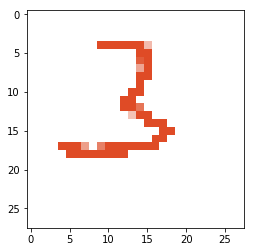

In [183]:
datatrim = data.split("base64,")[1]
im = Image.open(BytesIO(base64.b64decode(datatrim))).resize((28,28))
pix = numpy.array(im.getdata()).reshape(im.size[1], im.size[0], 4)
plt.imshow(pix)

In [167]:
pred=new_model.predict_classes(np.array([X_train[2]]))
print(Y_train[2])
print(pred)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[4]
